In [62]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('/content/Store Sales.csv')
df

,TransactionID,Timestamp,CustomerID,Name,Surname,Shipping_State,Item,Description,Retail_Price,Loyalty_Discount
0,112131,12/12/2016 17:51,100000932,Abigail,Ferguson,Massachusetts,4538875409,Couch Cover,79.80,0.07
1,111143,12/11/2016 21:31,100000932,Abigail,Ferguson,Massachusetts,8058527540,Jeans,35.91,0.07
2,110184,12/11/2016 2:03,100000932,Abigail,Ferguson,Massachusetts,6548962456,Dust Ruffle,65.79,0.07
3,110252,12/11/2016 3:18,200000490,Abigail,Fisher,Oklahoma,2113413915,Shorts,59.33,0.01
4,111471,12/12/2016 4:30,200000533,Abigail,Gibson,Arkansas,2876522496,Jacket,99.80,0.01
...,...,...,...,...,...,...,...,...,...,...
3450,109813,12/10/2016 18:20,100000299,Zoe,Johnston,Illinoi,3305177499,Coveralls (long sleeve),95.88,0.04
3451,111620,12/12/2016 7:30,400000555,Zoe,Murray,Missouri,6661671897,Swimwear,50.83,0.07
3452,111445,12/12/2016 3:58,400000555,Zoe,Murray,Missouri,3452086694,Bra,38.87,0.07
3453,111234,12/11/2016 23:31,400000555,Zoe,Murray,Missouri,8269421724,Long Overalls,124.75,0.07


In [64]:
df.drop_duplicates(inplace=True)

In [65]:
null_values = df.isna().sum()
print("Total null values in each column:")
print(null_values)

any_null = df.isna().any().any()
print("\nAre there any null values in the entire DataFrame? (True/False)")
print(any_null)

Total null values in each column:
TransactionID       0
Timestamp           0
CustomerID          0
Name                0
Surname             0
Shipping_State      0
Item                0
Description         0
Retail_Price        0
Loyalty_Discount    0
dtype: int64

Are there any null values in the entire DataFrame? (True/False)
False


In [66]:
df.size

34550

In [67]:
# Calculate discount percentage
df['Discount_Percentage'] = (df['Loyalty_Discount'] / df['Retail_Price']) * 100

df_grouped = (
    df.groupby('Description')[['Retail_Price', 'Discount_Percentage']]
    .mean()
    .reset_index()
    .sort_values(by='Discount_Percentage', ascending=False)
    .head(10)
)

print(df_grouped)

   Description  Retail_Price  Discount_Percentage
62   Underwear      5.880000             0.913328
26         Hat     10.890000             0.550964
0        Apron      9.480000             0.482218
9          Bra     23.365283             0.450888
52       Socks     43.383409             0.377768
3     Bath Mat     22.623797             0.373317
16  Crib Sheet     31.053846             0.362614
66   Washcloth     22.960000             0.357870
17  Dish Towel     29.304938             0.307972
44  Short Slip     51.357955             0.279676


In [68]:
df.describe()

,TransactionID,CustomerID,Item,Retail_Price,Loyalty_Discount,Discount_Percentage
count,3455.000000,3.455000e+03,3.455000e+03,3455.000000,3455.000000,3455.000000
mean,111528.000000,1.797979e+08,5.276712e+09,58.526237,0.050457,0.149807
std,997.516917,9.563412e+07,2.600486e+09,34.464217,0.032215,0.209342
min,109801.000000,1.000000e+08,1.039855e+09,5.600000,0.000000,0.000000
25%,110664.500000,1.000003e+08,2.963301e+09,31.800000,0.020000,0.040080
50%,111528.000000,1.000009e+08,5.145202e+09,51.660000,0.050000,0.086580
75%,112391.500000,2.000009e+08,7.645689e+09,79.800000,0.080000,0.166334
max,113255.000000,4.000009e+08,9.916068e+09,159.800000,0.100000,1.785714


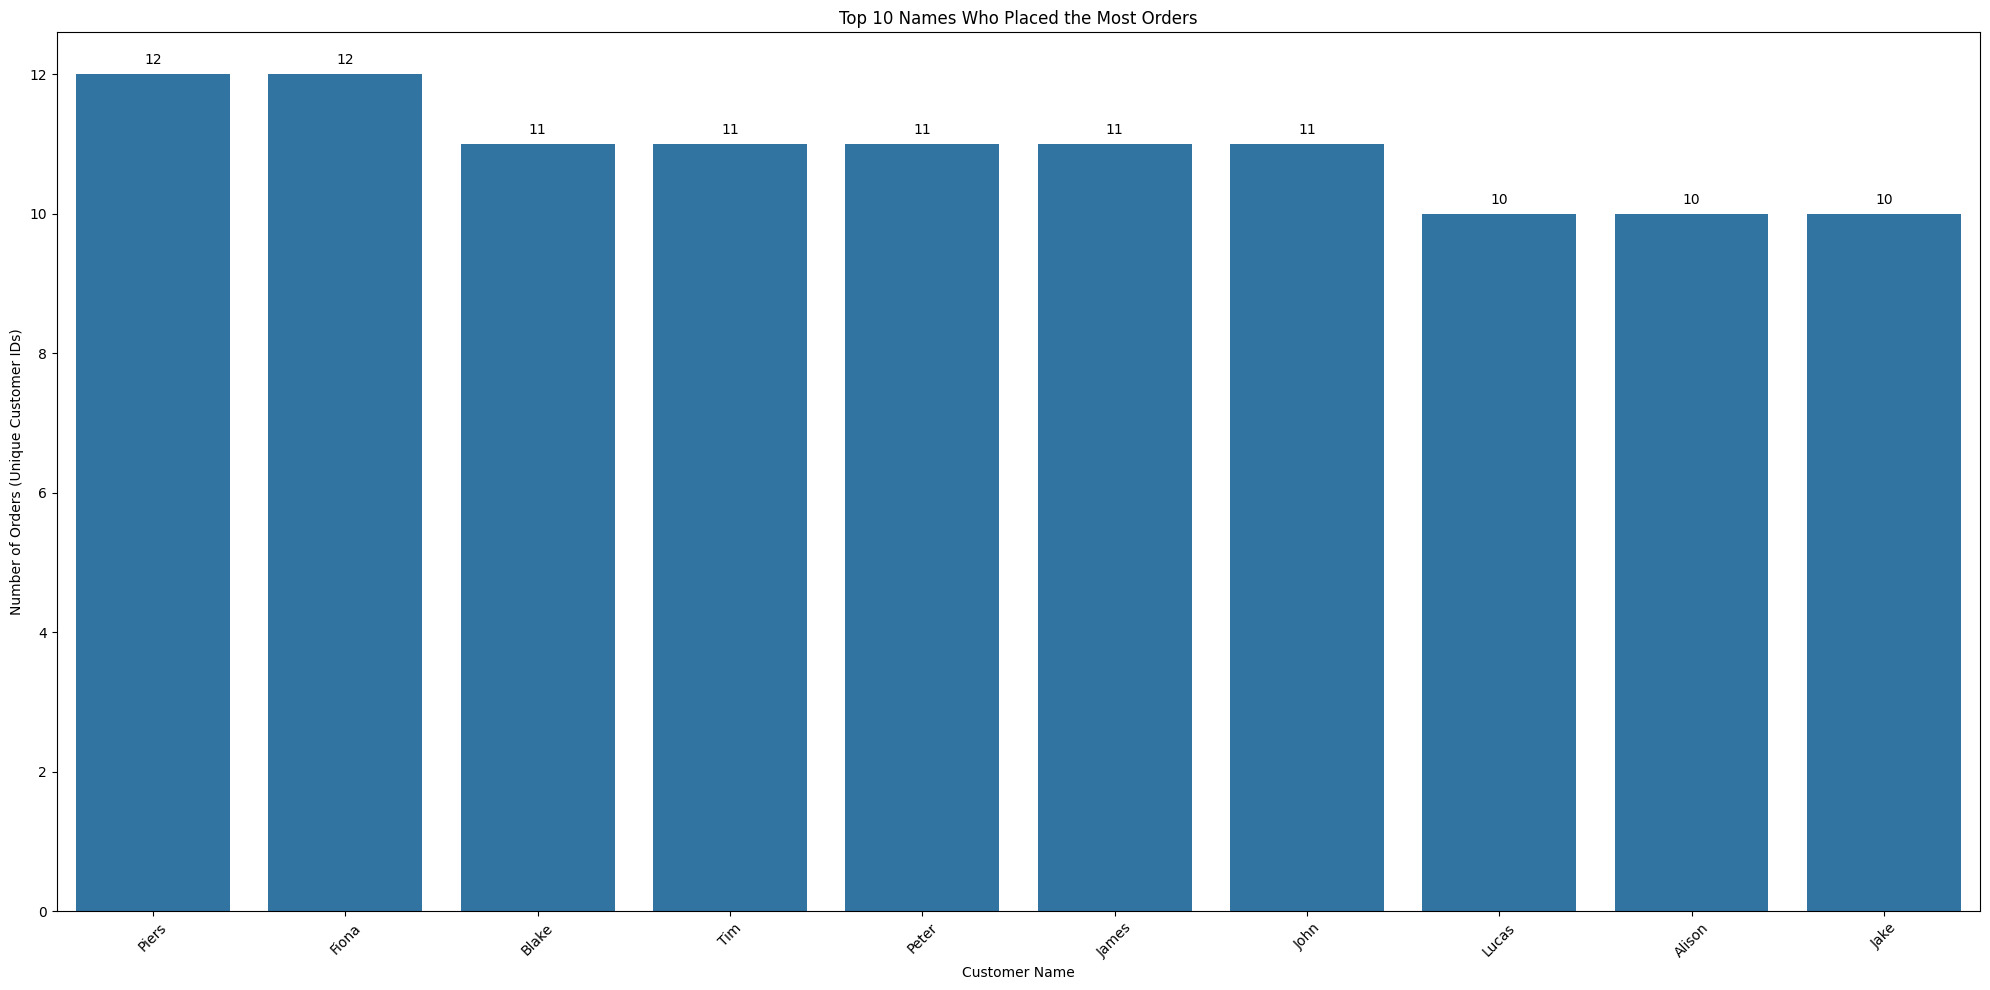

In [69]:
 #@title Top 10 Names Who Placed the Most Orders.
df_grouped = (
    df.groupby('Name')['CustomerID'].nunique().reset_index()
    .sort_values(by='CustomerID', ascending=False).head(10)
)
customer_counts = df_grouped['CustomerID'].tolist()

sns.barplot(x="Name", y="CustomerID", data=df_grouped)
plt.xticks(rotation=45)
plt.xlabel("Customer Name")
plt.ylabel("Number of Orders (Unique Customer IDs)")
plt.title("Top 10 Names Who Placed the Most Orders")

for i, v in enumerate(customer_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-70-6a99e1acaa77>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


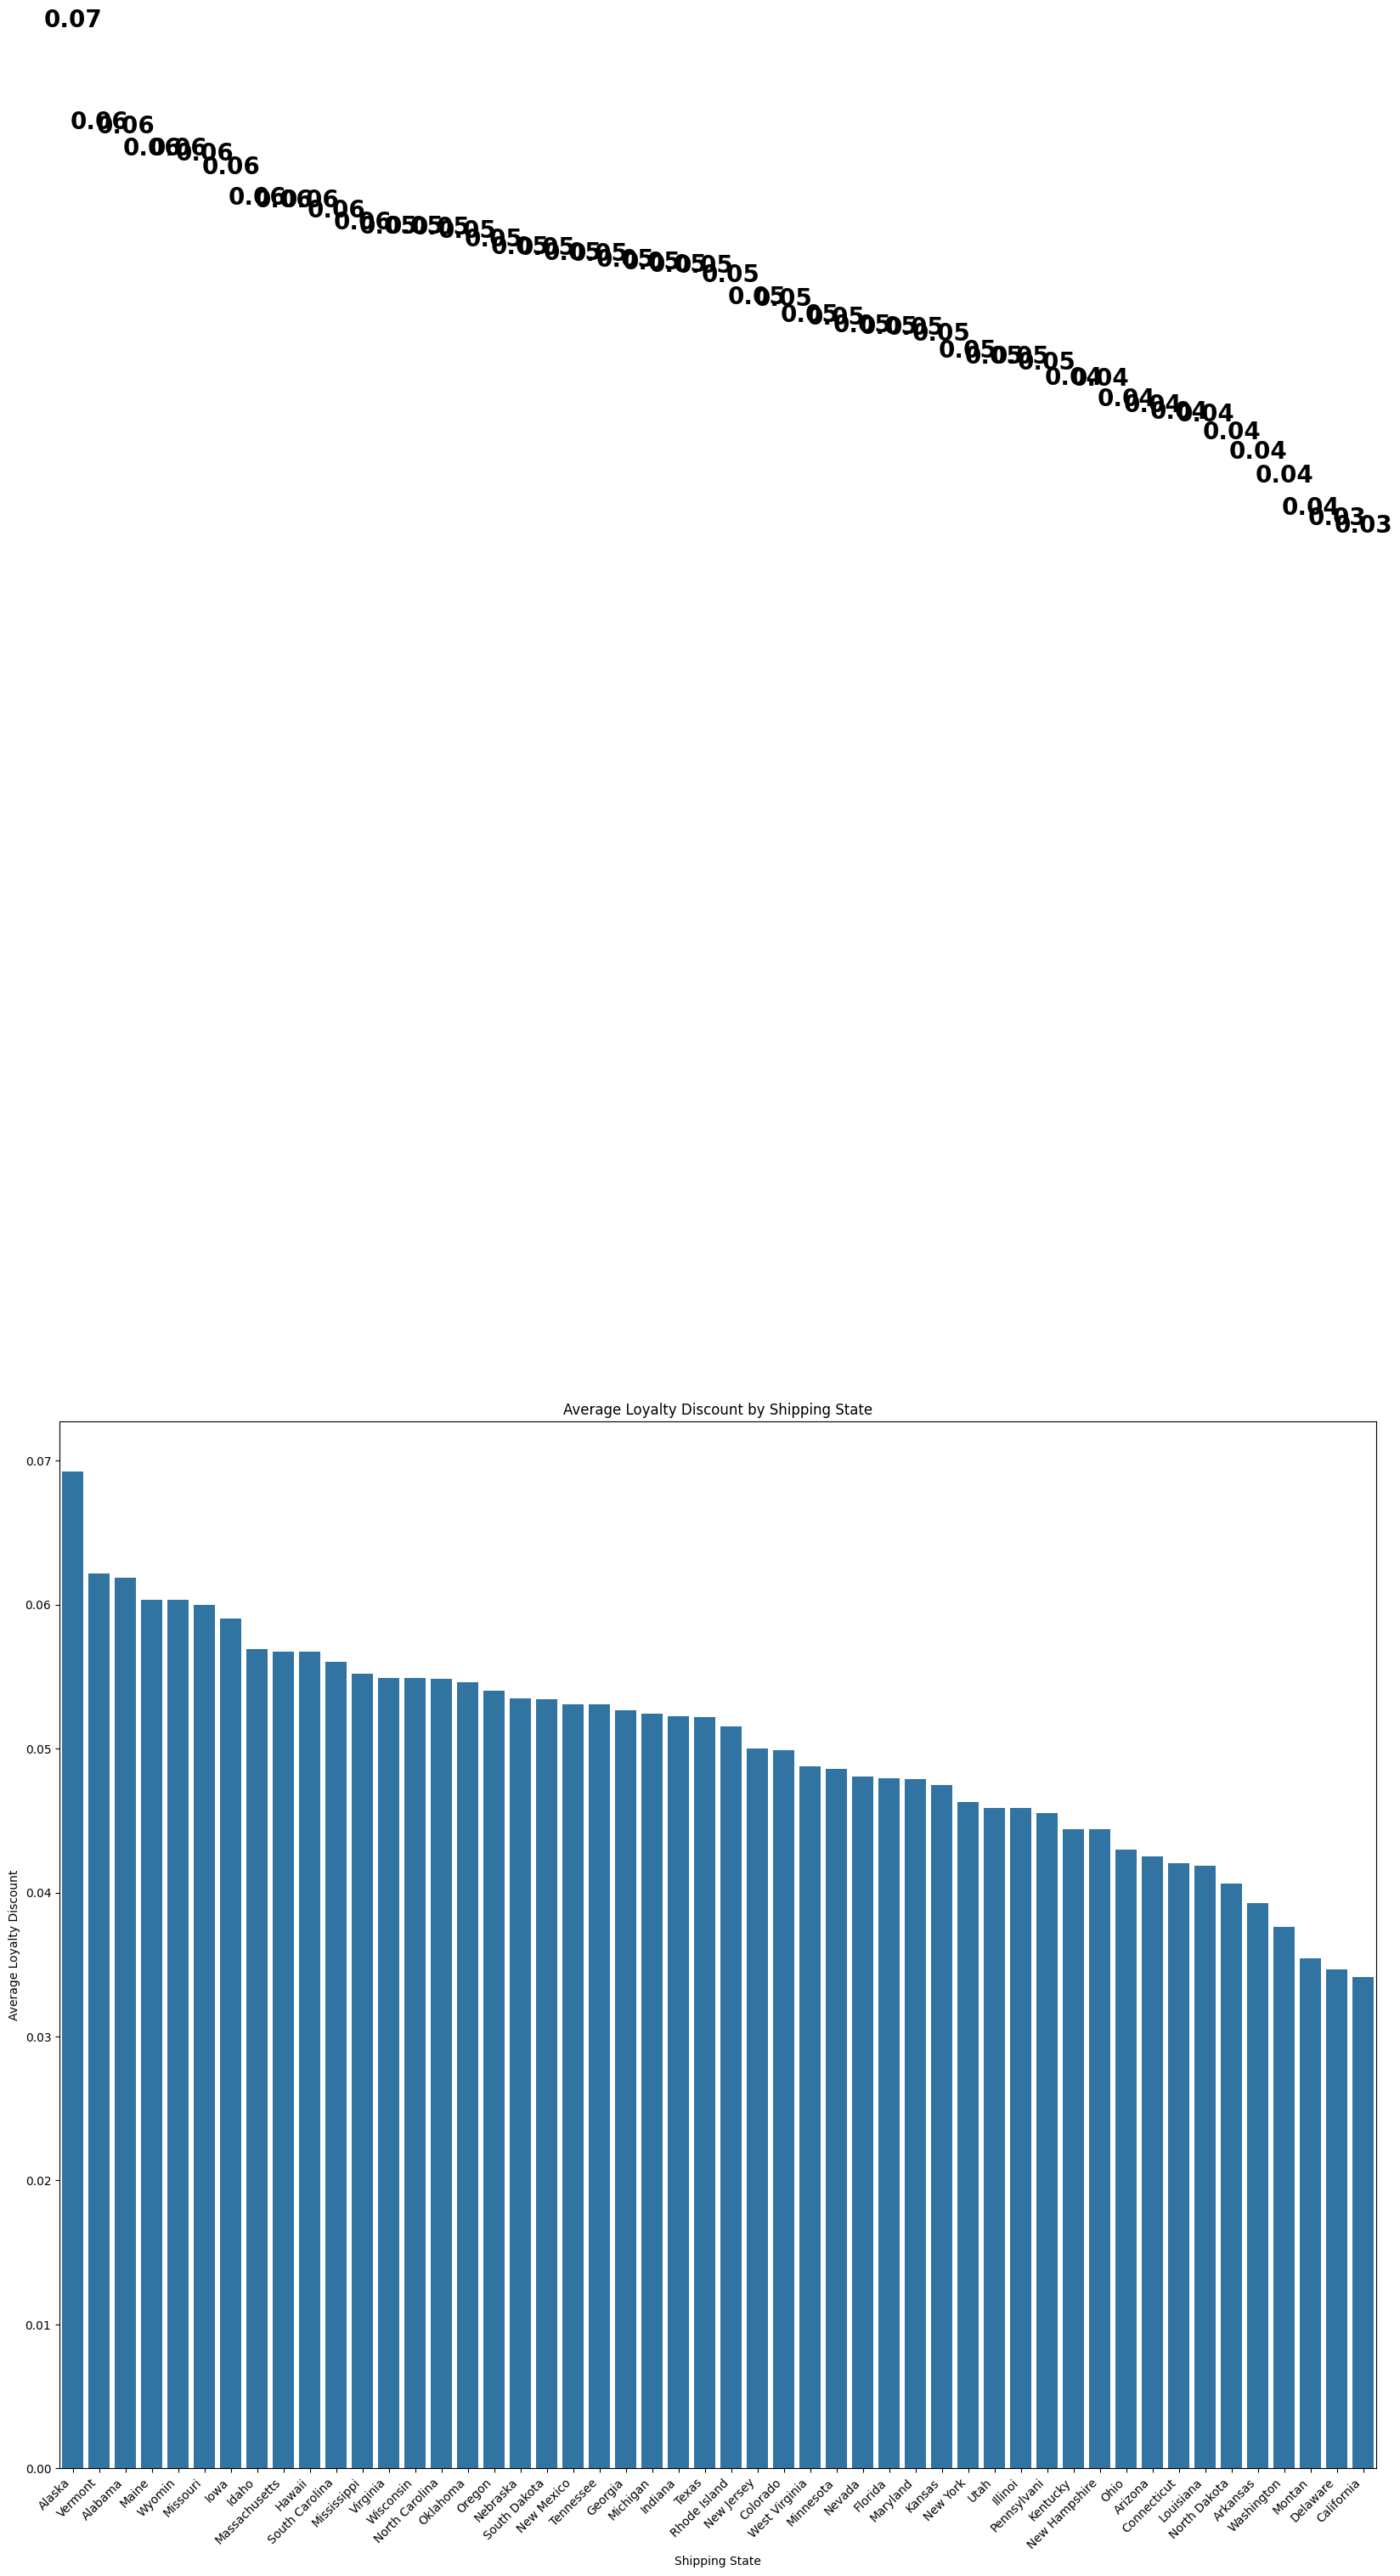

In [70]:
# @title Average Loyalty Discount by Shipping State

df_grouped = (
    df.groupby('Shipping_State')['Loyalty_Discount'].mean().sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(20, 16))
sns.barplot(x=df_grouped.index, y=df_grouped.values, ax=ax)

for i, v in enumerate(df_grouped.values):
    offset = 0.1  # Minimum offset to ensure visibility
    if abs(v) < 0.01:
        v = 0.01 * np.sign(v)

    ax.text(i, v + offset, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=20)

plt.xlabel("Shipping State")
plt.ylabel("Average Loyalty Discount")
plt.title('Average Loyalty Discount by Shipping State')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for long states
plt.tight_layout()
plt.show()


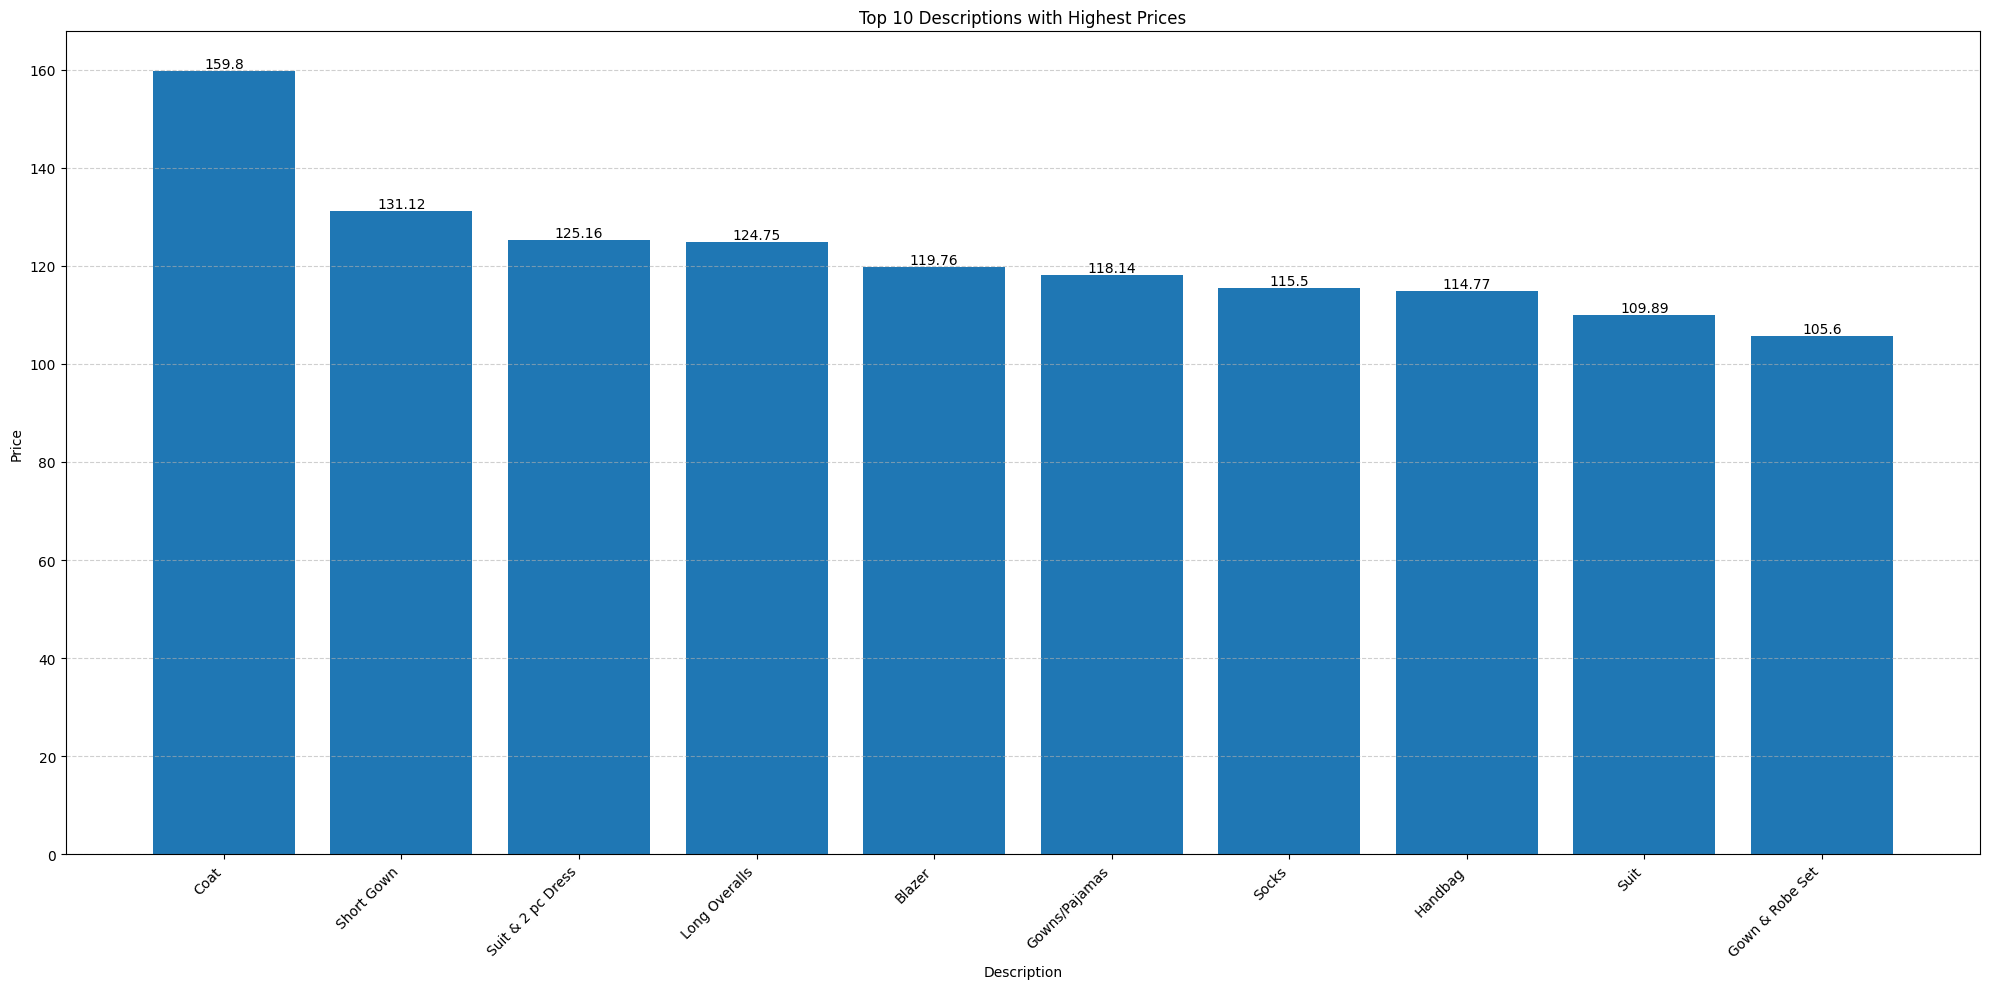

In [71]:
 #@title Top 10 Product with Highest Prices.
df_grouped = (
    df.groupby('Description')['Retail_Price']
    .max()
    .reset_index()
    .sort_values(by='Retail_Price', ascending=False)
    .head(10)
)

descriptions = df_grouped['Description'].tolist()
prices = df_grouped['Retail_Price'].tolist()

x = plt.bar(descriptions, prices)
plt.xlabel("Description")
plt.ylabel("Price")
plt.title("Top 10 Descriptions with Highest Prices")
plt.xticks(rotation=45, ha='right')

plt.bar_label(x)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

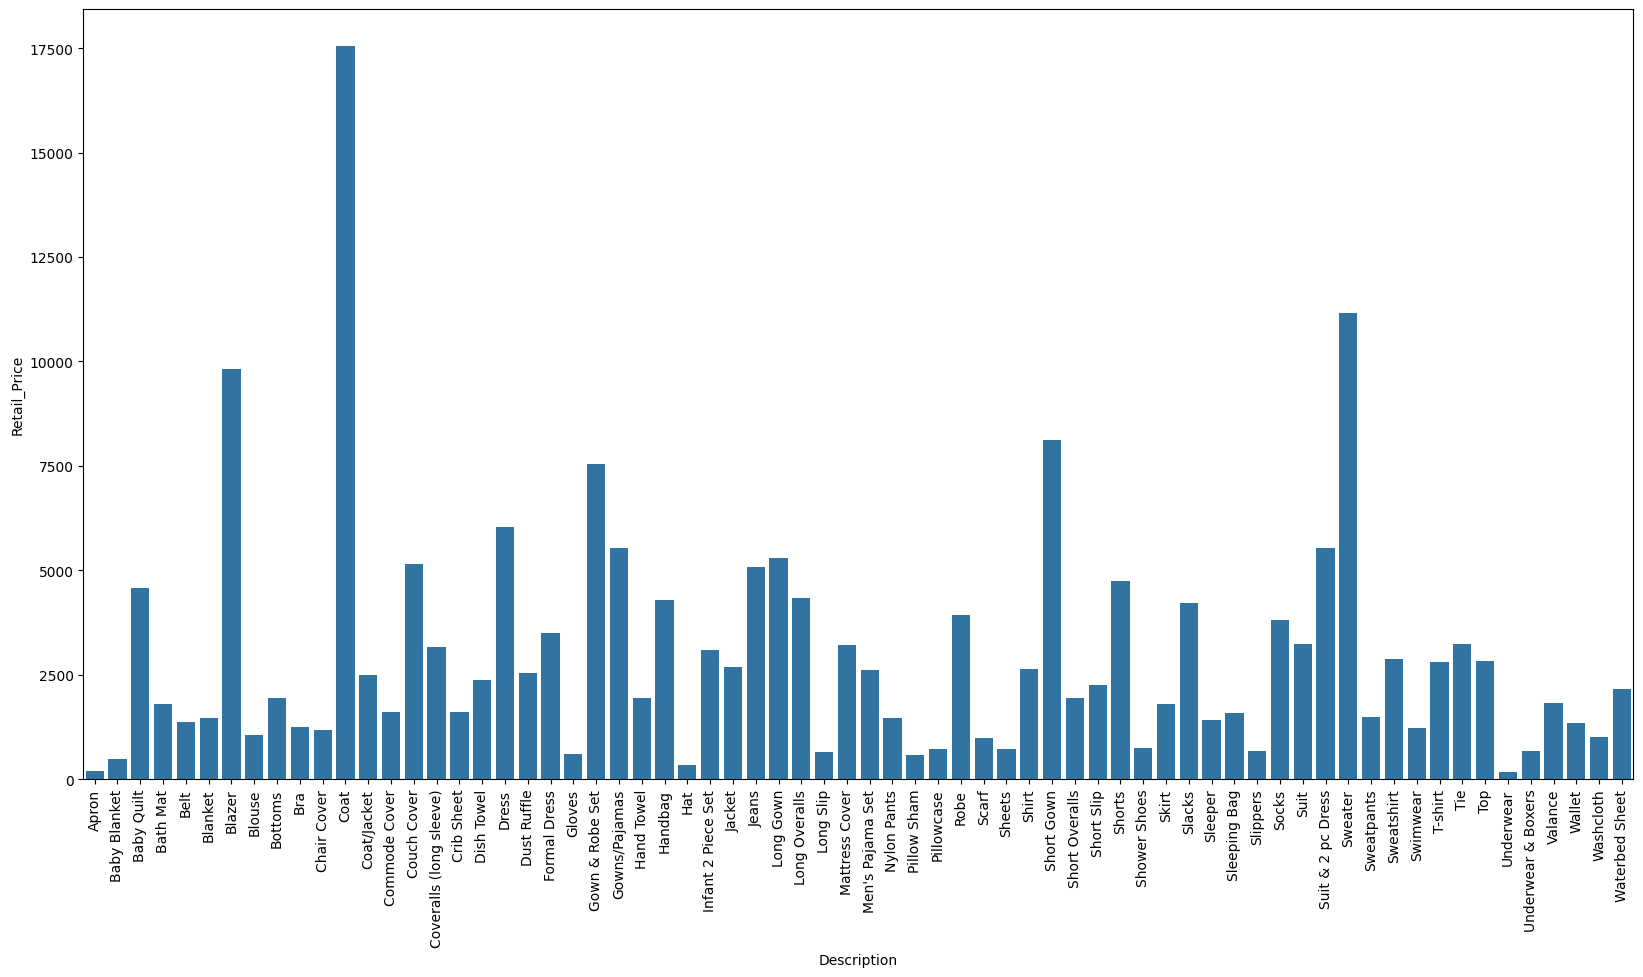

In [72]:
 #@title Product with Retail_Price.
df_group = df.groupby('Description')['Retail_Price'].sum().reset_index()
plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x="Description", y="Retail_Price", data=df_group)
plt.xticks(rotation=90)
plt.show()

Enter a shipping state to analyze: Massachusetts


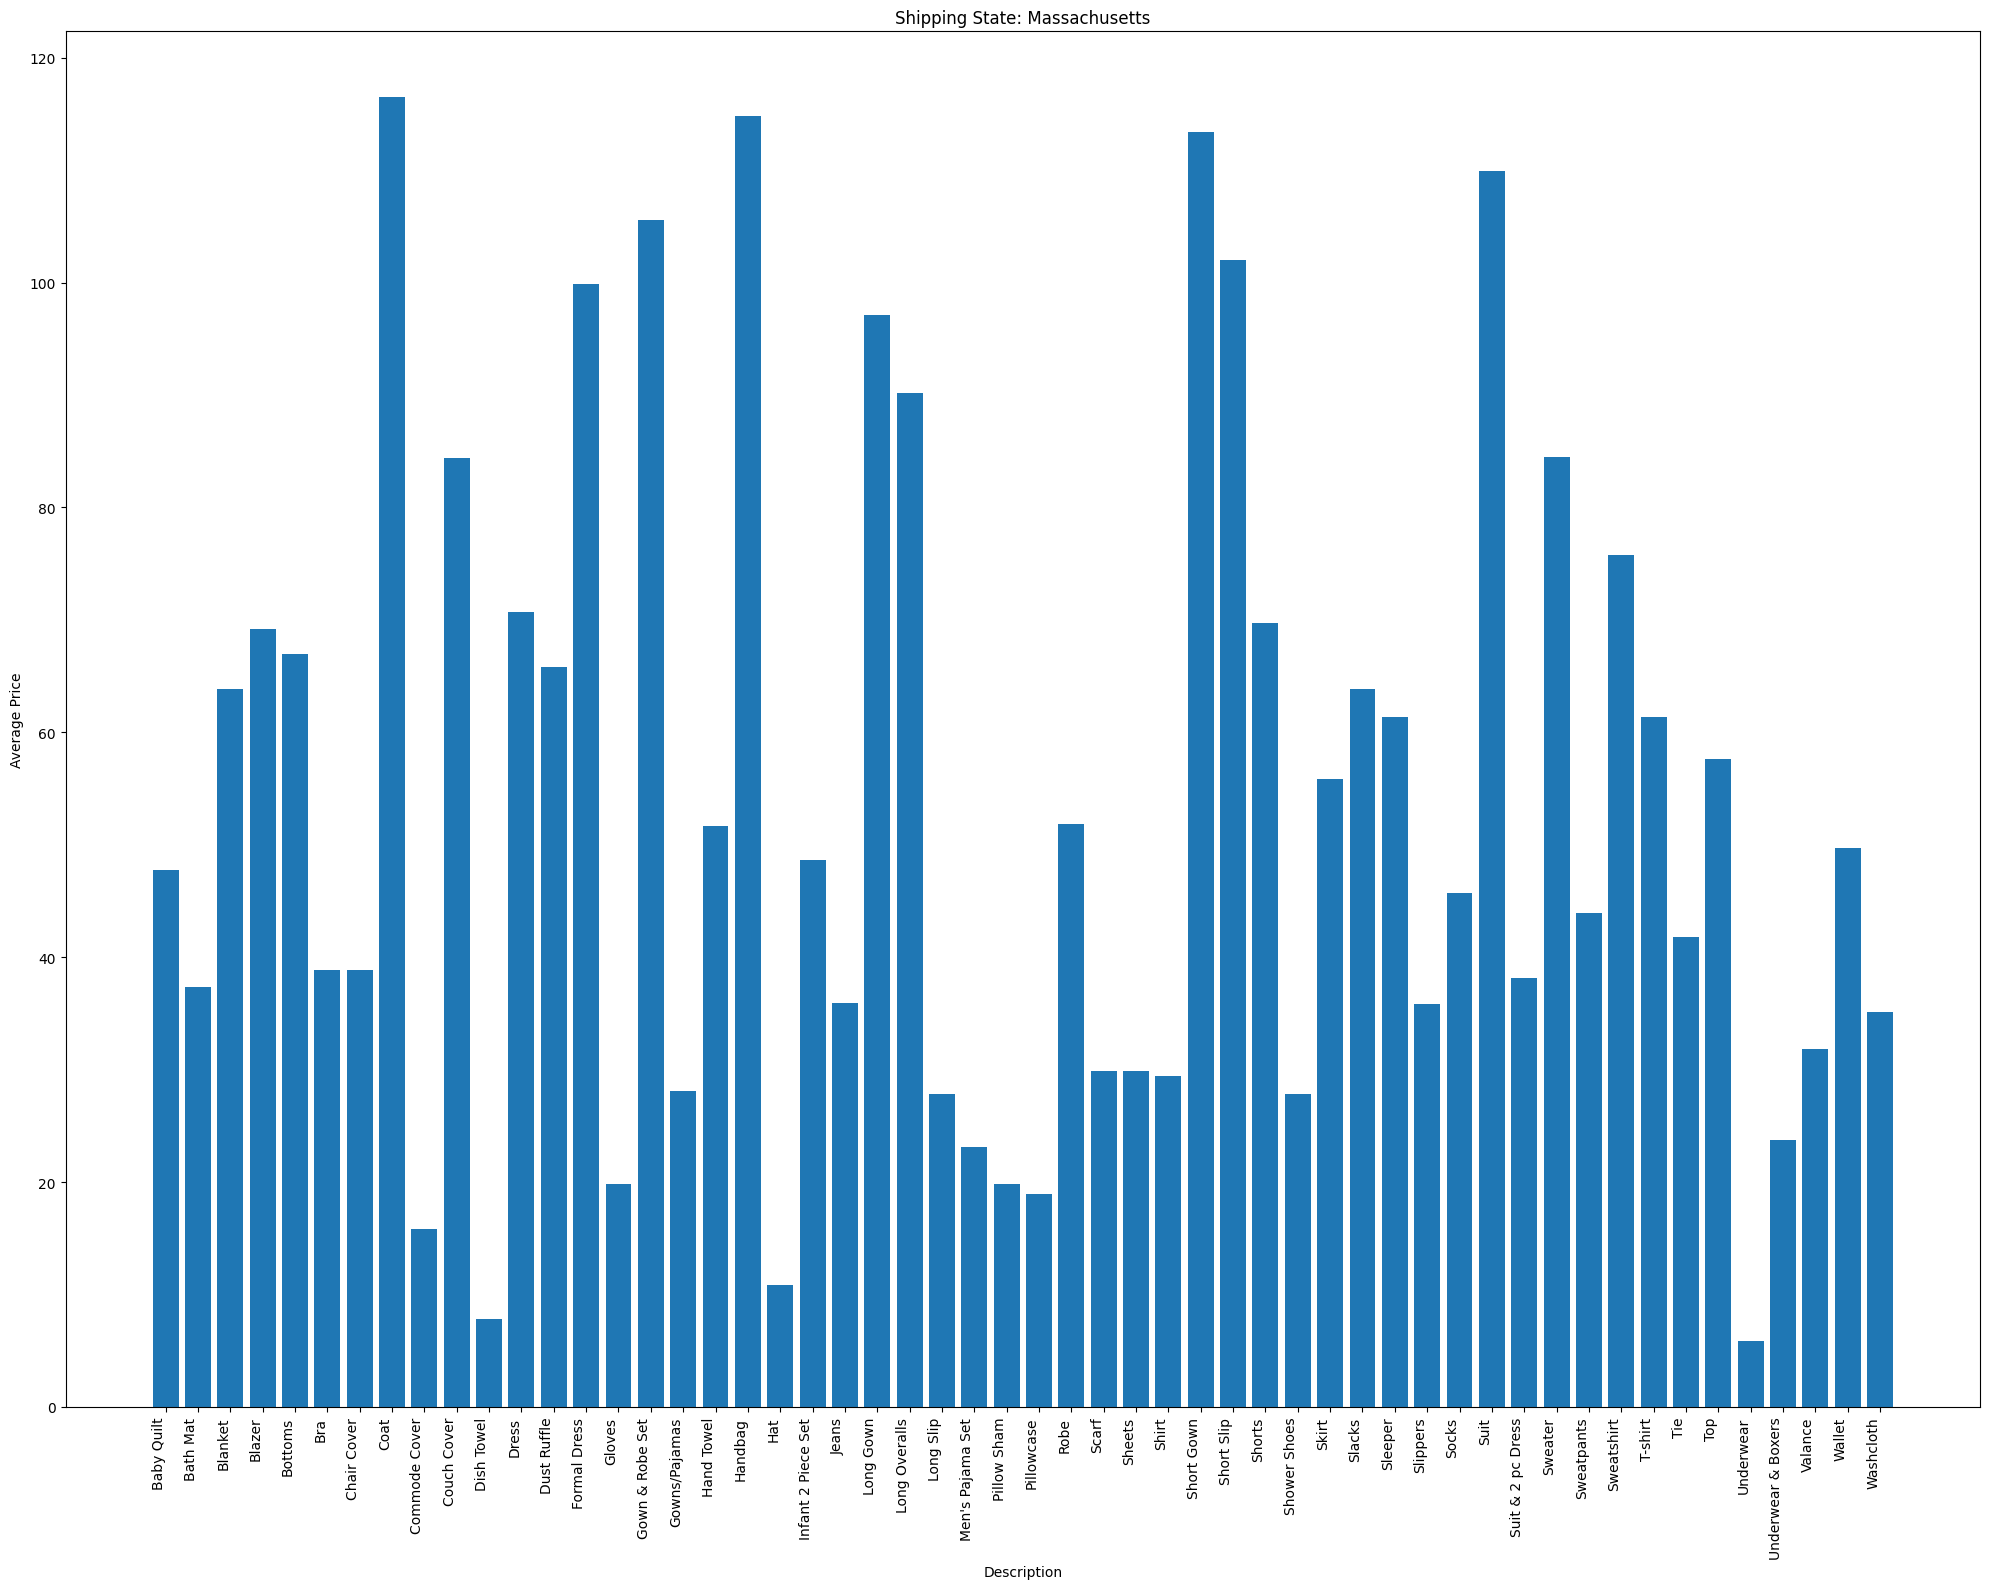

In [74]:
# @title Shipping State vs Product with Retail_Price.
df_grouped = df.groupby(['Shipping_State', 'Description'])['Retail_Price'].mean().reset_index()
shipping_state = input("Enter a shipping state to analyze: ")
df_state_filtered = df_grouped[df_grouped['Shipping_State'] == shipping_state]

if df_state_filtered.empty:
    print(f"No data found for shipping state: {shipping_state}")
else:
    descriptions = df_state_filtered['Description'].tolist()
    prices = df_state_filtered['Retail_Price'].tolist()

    plt.figure(figsize=(20, 16))
    plt.bar(descriptions, prices)
    plt.xlabel("Description")
    plt.ylabel("Average Price")
    plt.title(f"Shipping State: {shipping_state}")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()